In [1]:
import spacy
from utils import *

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize": (20, 10)})

# Carregando os dados

In [2]:
positives_df = pd.read_csv("../data/extreme_positive.csv").drop_duplicates("review_id")
negatives_df = pd.read_csv("../data/extreme_negative.csv").drop_duplicates("review_id")
nlp = spacy.load("en_core_web_md")


# Aplicando pre-processamento

In [3]:
positives_df["review_body"] = apply_text_processing_pipeline(positives_df["review_body"])
negatives_df["review_body"] = apply_text_processing_pipeline(negatives_df["review_body"])

In [4]:
len(positives_df), len(negatives_df)

(3315, 513)

In [5]:
# Amostrando para caber na memória :(
raw_text_p = "\n".join(positives_df["review_body"].sample(frac=.5).to_list())
raw_text_n = "\n".join(negatives_df["review_body"].to_list())

# Visualizando palavras mais frequentes (considerando reviews positivas e negativas)

In [6]:
from textacy.spacier.doc_extensions import to_bag_of_words

In [7]:
doc = nlp(raw_text_p + raw_text_n)

In [8]:
word_dict = to_bag_of_words(doc, filter_stops=True, filter_punct=True, as_strings=True)
word_freq_df = pd.DataFrame(index=word_dict.keys(), data=word_dict.values(), columns=["freq"])
word_freq_df.drop("-PRON-", axis=0, inplace=True) # special token

In [9]:
word_freq_df.sort_values(by="freq", ascending=False, inplace=True)

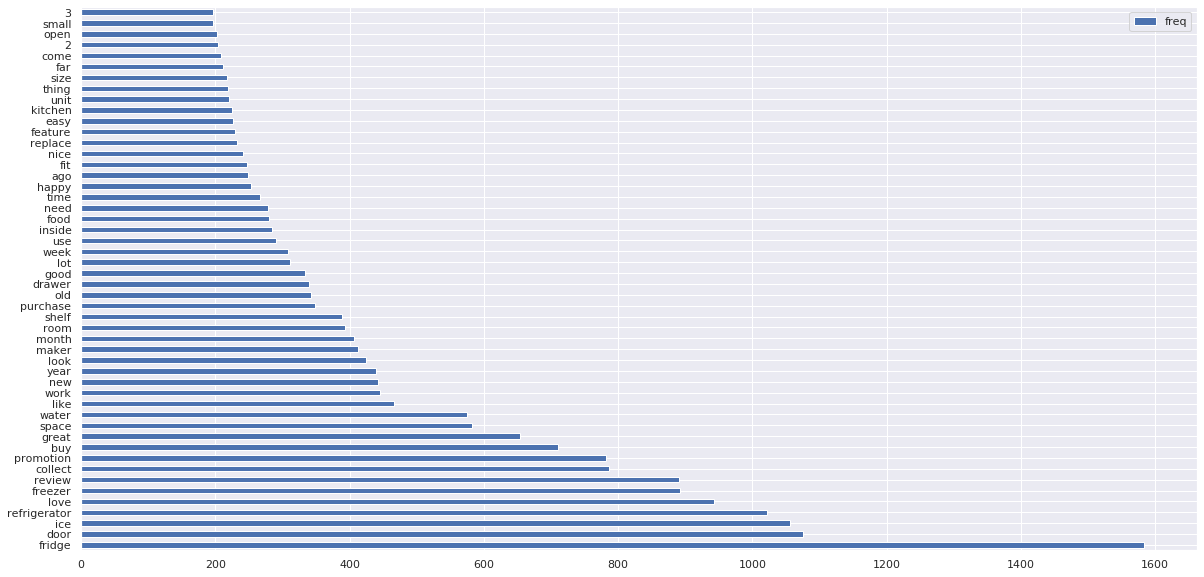

In [10]:
word_freq_df.head(50).plot.barh()

## Salvando palavras mais frequentes para posterior filtragem

In [11]:
import json
most_freq = word_freq_df.index.to_list()[:200]
with open("../data/frequent_words.json", "w") as f:
    json.dump(most_freq, f, indent=2)


# Avaliando 3-grams

In [12]:
# TODO: filtrar positivo negativo

In [13]:
from textacy.spacier.doc_extensions import to_bag_of_terms

In [14]:
ngrams_dict = to_bag_of_terms(nlp(raw_text_p), ngrams=(2,3,4), filter_stops=True, filter_punct=True, as_strings=True)

In [15]:
ngram_df = pd.DataFrame(index=ngrams_dict.keys(), data=ngrams_dict.values(), columns=["freq"])
ngram_df.sort_values(by="freq", ascending=False, inplace=True)
ngram_df.drop(index="review be collect", inplace=True) # frase recorrente

In [16]:
ngram_df

,freq
ice maker,269
one,120
month ago,103
water dispenser,96
GE,90
...,...
new GE french,1
year of usage,1
arenA¢AAt completely closed,1
door arenA¢AAt completely,1


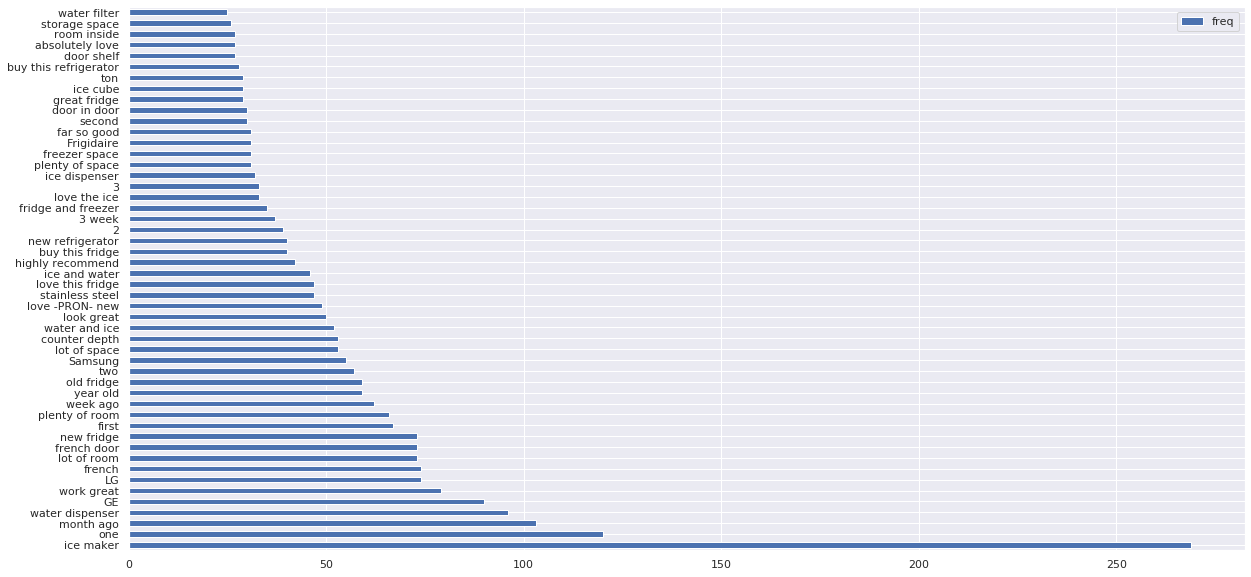

In [17]:
ngram_df.head(50).plot.barh()